# Analyse des modèles

Observons quelques exemples d'ECG mal classés afin de voir s'il existe un pattern dans la mauvaise classification :

In [1]:
from tensorflow import keras
import pandas as pd
import matplotlib.pyplot as plt
from random import choice
from sklearn.metrics import classification_report
import seaborn as sns

In [2]:
ANN_1 = keras.models.load_model("../models/ANN_1")
CNN_1 = keras.models.load_model("../models/CNN_1")


In [3]:
mit_test = pd.read_csv("../data/mitbih_test.csv", header=None)
mit_train = pd.read_csv("../data/mitbih_train.csv", header=None)
X_train = mit_train.iloc[:,:-1]
y_train = mit_train.iloc[:,-1]
X_test = mit_test.iloc[:,:-1]
y_test = mit_test.iloc[:,-1]

In [4]:
CNN_predict = pd.Series(CNN_1.predict(X_test).argmax(1))

In [136]:
pd.crosstab(y_test, CNN_predict, rownames = ["reel"], colnames = ["predict"])

predict,0,1,2,3,4
reel,,,,,
0.0,17624,298,107,74,15
1.0,90,454,10,2,0
2.0,47,7,1364,24,6
3.0,15,2,11,134,0
4.0,41,6,10,0,1551


In [137]:
print(classification_report(y_test, CNN_predict))

              precision    recall  f1-score   support

         0.0       0.99      0.97      0.98     18118
         1.0       0.59      0.82      0.69       556
         2.0       0.91      0.94      0.92      1448
         3.0       0.57      0.83      0.68       162
         4.0       0.99      0.96      0.98      1608

    accuracy                           0.97     21892
   macro avg       0.81      0.90      0.85     21892
weighted avg       0.97      0.97      0.97     21892



In [138]:
CNN_output = pd.concat([y_test.astype(int), CNN_predict], axis=1)

In [139]:
CNN_output.columns = ["reel", "predict_CNN"]

Les rappels des classes 1 et 3 sont les moins bonnes. Regardons des exemples d'ECG de classe 1 clasifiées en 0 par le CNN, puis des exemples de classe 1 correctement classifiés : 

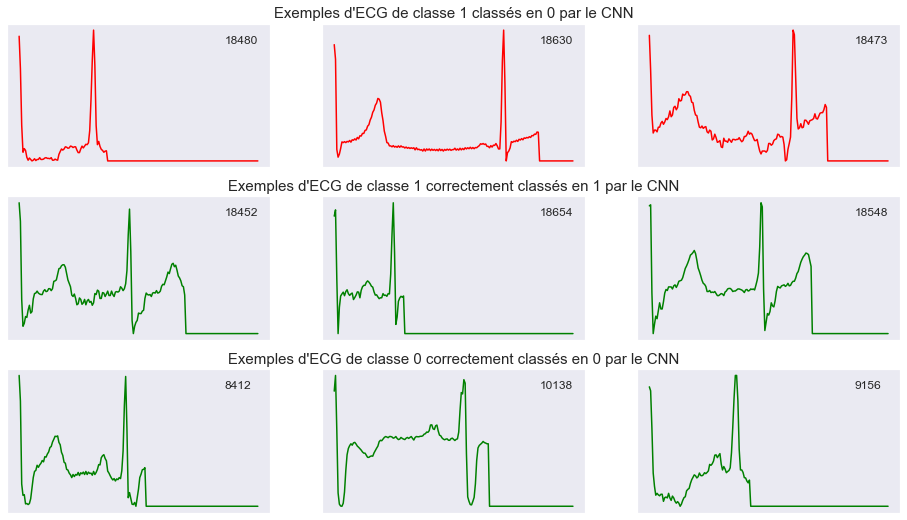

In [153]:
fig,ax = plt.subplots(3,3, figsize = (16,9)) 
sns.set_theme()

for i in range(3): 
    indice_0 = choice(CNN_output[(CNN_output["reel"] == 1) & (CNN_output["predict_CNN"] == 0)].index) 
    ax[0,i].plot(X_test.iloc[indice_0], c="red")
    ax[0,i].get_xaxis().set_visible(False)
    ax[0,i].get_yaxis().set_visible(False)
    ax[0,1].set_title("Exemples d'ECG de classe 1 classés en 0 par le CNN", fontsize = 15)
    ax[0,i].text(160, 0.9, indice_0)
    
for i in range(3): 
    indice_1 = choice(CNN_output[(CNN_output["reel"] == 1) & (CNN_output["predict_CNN"] == 1)].index) 
    ax[1,i].plot(X_test.iloc[indice_1], c="green")
    ax[1,i].get_xaxis().set_visible(False)
    ax[1,i].get_yaxis().set_visible(False)
    ax[1,1].set_title("Exemples d'ECG de classe 1 correctement classés en 1 par le CNN", fontsize = 15)
    ax[1,i].text(160, 0.9, indice_1)
    
for i in range(3): 
    indice_2 = choice(CNN_output[(CNN_output["reel"] == 0) & (CNN_output["predict_CNN"] == 0)].index) 
    ax[2,i].plot(X_test.iloc[indice_2], c="green")
    ax[2,i].get_xaxis().set_visible(False)
    ax[2,i].get_yaxis().set_visible(False)
    ax[2,1].set_title("Exemples d'ECG de classe 0 correctement classés en 0 par le CNN", fontsize = 15)
    ax[2,i].text(160, 0.9, indice_2)

On voit que le modèle arrive à bien détecter les grandes vagues T caractéristiques de certaines "classe 1". Par contre on voit que certaines grosses vagues T sont classées en 0 et l'algorithme les classe en 1.